<a href="https://colab.research.google.com/github/saniya1027108/pneumonia-xray-ml-model/blob/branch1/Pneumonia_X_Ray_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia X-ray ML Model

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

The normal chest X-ray depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia typically exhibits a focal lobar consolidation, in this case in the right upper lobe, whereas viral pneumonia manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.



**Data** for this project comes from [here](https://data.mendeley.com/datasets/rscbjbr9sj/2)

**Citation :** Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2

![Image](https://i.imgur.com/jZqpV51.png)

Importing our data from the cloud and viewing and understanding it.

In [ ]:
# Unzipping our dataset 
# This cell is executed once and needs not to be executed again
#!unzip  "/content/drive/MyDrive/Pneumonia/archive.zip" -d "/content/drive/MyDrive/Pneumonia"

In [ ]:
!ls "/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray"

test  train  val


In [ ]:
!ls "/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train"

NORMAL	PNEUMONIA


So we have two types of dataset one with Normal X-ray and another affected with Pneumonia

In [ ]:
!ls "/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train/PNEUMONIA"

person1000_bacteria_2931.jpeg  person30_bacteria_149.jpeg
person1000_virus_1681.jpeg     person30_bacteria_150.jpeg
person1001_bacteria_2932.jpeg  person30_bacteria_151.jpeg
person1002_bacteria_2933.jpeg  person30_bacteria_152.jpeg
person1003_bacteria_2934.jpeg  person30_bacteria_153.jpeg
person1003_virus_1685.jpeg     person30_bacteria_154.jpeg
person1004_bacteria_2935.jpeg  person30_bacteria_155.jpeg
person1004_virus_1686.jpeg     person30_bacteria_156.jpeg
person1005_bacteria_2936.jpeg  person30_bacteria_157.jpeg
person1005_virus_1688.jpeg     person30_bacteria_158.jpeg
person1006_bacteria_2937.jpeg  person310_bacteria_1450.jpeg
person1007_bacteria_2938.jpeg  person310_bacteria_1451.jpeg
person1007_virus_1690.jpeg     person310_virus_633.jpeg
person1008_bacteria_2939.jpeg  person311_bacteria_1452.jpeg
person1008_virus_1691.jpeg     person311_bacteria_1453.jpeg
person1009_virus_1694.jpeg     person311_virus_634.jpeg
person100_virus_184.jpeg       person312_bacteria_1454.jpeg
person10

Getting more insights of our data :

In [ ]:
import os 

# Walkthrough chest xray directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 3 directories and 1 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray'. 
There are 2 directories and 1 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/test'. 
There are 0 directories and 234 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/test/NORMAL'. 
There are 0 directories and 390 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/test/PNEUMONIA'. 
There are 2 directories and 1 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train'. 
There are 0 directories and 1342 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train/NORMAL'. 
There are 0 directories and 3876 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train/PNEUMONIA'. 
There are 2 directories and 1 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/val'. 
There are 0 directories and 9 images in '/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/val/NORMAL'. 
There are 0 direc

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['NORMAL' 'PNEUMONIA']


In [ ]:
# Visualizing our data 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory 
  target_folder = target_dir+target_class

  # Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image 

  return img

Visualizing our data so that we can understand our data more efficiently by randomly selecting an image and viewing it.

['person25_virus_59.jpeg']
Image shape: (616, 960)


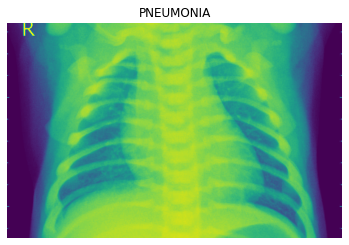

In [ ]:
# Viewing a random image from train
img = view_random_image(target_dir="/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/test/",
                        target_class="PNEUMONIA")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(616, 960), dtype=uint8, numpy=
array([[4, 4, 5, ..., 0, 0, 0],
       [4, 4, 5, ..., 0, 0, 0],
       [4, 4, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [ ]:
# Image shape 
img.shape

(616, 960)

In [ ]:
# Neural networks preffer Normalization
img/255.

array([[0.01568627, 0.01568627, 0.01960784, ..., 0.        , 0.        ,
        0.        ],
       [0.01568627, 0.01568627, 0.01960784, ..., 0.        , 0.        ,
        0.        ],
       [0.01568627, 0.01568627, 0.01960784, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Lets visualize our data with respect to one another like the Normal X-ray and the infected one.

## 1. Visualizing the data 

['NORMAL2-IM-0582-0001.jpeg']
Image shape: (1190, 1484)
['person337_bacteria_1565.jpeg']
Image shape: (688, 824)


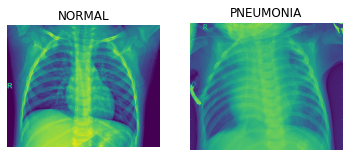

In [ ]:
# Visualize both the data 
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train/", "NORMAL")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train/", "PNEUMONIA")

## 2. Preprocessing the data 

The data presented to us is not same, some images are of random shapes and also let's Normalize our data so that it becomes easier for our Neural Network to learn patterns.

In [ ]:
# Defining directory dataset paths
train_dir = "/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/train"
val_dir = "/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/val"
test_dir = "/content/drive/MyDrive/Pneumonia/chest_xray/chest_xray/test/"

Turning our data into batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalization 
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

val_data = val_datagen.flow_from_directory(directory=val_dir,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode="binary",
                                           seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The batch size we are using for this network is 32. also according to this research paper it is the best in most cases - https://arxiv.org/pdf/1804.07612v1.pdf


In [ ]:
# Getting a sample of a train data batch
images, labels = train_data.next()  
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

163

In [ ]:
5216/32

163.0

In [ ]:
# Viewing the first batch of labels
labels

array([1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
      dtype=float32)

## 3. Creating our models

We are using a CNNs (Convolutional Neural Networks) to get quick results on our model than a normal ANN (Artificial Neural Network)

### 1. Model 1

For this model we will be using a Conv2D layer then a MaxPool2D then Conv2D layer and then a MaxPool2D layer followed by a Flatten and output layer.

*All the models are trained and saved in the drive, so they need not to be run again.*

In [ ]:
# Build a CNN model 
model_1 = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",

                            input_shape=(224, 224, 3)),
     tf.keras.layers.MaxPool2D(pool_size=2,

                               padding="valid"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# seed  
tf.random.set_seed(42)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5
163/163 [==============================] - 2148s 13s/step - loss: 0.2359 - accuracy: 0.8938 - val_loss: 0.6996 - val_accuracy: 0.6875
Epoch 2/5
163/163 [==============================] - 185s 1s/step - loss: 0.0940 - accuracy: 0.9638 - val_loss: 0.4416 - val_accuracy: 0.7500
Epoch 3/5
163/163 [==============================] - 182s 1s/step - loss: 0.0799 - accuracy: 0.9703 - val_loss: 0.4807 - val_accuracy: 0.7500
Epoch 4/5
163/163 [==============================] - 180s 1s/step - loss: 0.0624 - accuracy: 0.9755 - val_loss: 1.1050 - val_accuracy: 0.6250
Epoch 5/5
163/163 [==============================] - 180s 1s/step - loss: 0.0639 - accuracy: 0.9757 - val_loss: 0.1695 - val_accuracy: 0.9375


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 29161     
Total params: 30,351
Trainable params: 30,351
Non-trainable params: 0
__________________________________________________

In [ ]:
# model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Pneumonia/model_1.h5")
# model_1.summary()

In [ ]:
# Evaluating our model
model_1.evaluate(test_data)

20/20 [==============================] - 206s 11s/step - loss: 1.0591 - accuracy: 0.7532


[1.0590711832046509, 0.7532051205635071]

In [ ]:
# Plotting the valildation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss 
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
plot_loss_curves(history_1)

NameError: ignored

In [ ]:
# model_1.save("/content/drive/MyDrive/Pneumonia/model_1.h5")

### 2. Model 2

For this model we will be using a Conv2D layer, then a Conv2D layer, then a MaxPool2D layer, then Conv2D layer, then Conv2D layer and then a MaxPool2D layer followed by a Flatten and output layer.

*All the models are trained and saved in the drive, so they need not to be run again.*

In [ ]:
# Build a CNN model (Tiny VGG)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# seed  
tf.random.set_seed(42)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

In [ ]:
# loading our model
# model_2 = tf.keras.models.load_model("/content/drive/MyDrive/Pneumonia/model_2.h5")

In [ ]:
model_2.summary()

In [ ]:
# model_2.save("/content/drive/MyDrive/Pneumonia/model_2.h5")

In [ ]:
# Evaluating our model
model_2.evaluate(test_data)

In [ ]:
plot_loss_curves(history_2)

### 3. Model 3

For this model we will be using a Conv2D layer, then a Conv2D layer, then a MaxPool2D layer, then Conv2D layer, then Conv2D layer and then a MaxPool2D layer followed by a Flatten and output layer. But the `Adam()`'s learning rate set to `0.01`.

*All the models are trained and saved in the drive, so they need not to be run again.*

In [ ]:
# Build a CNN model (Tiny VGG)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

In [ ]:
# seed  
tf.random.set_seed(42)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

In [ ]:
# loading our model
# model_3 = tf.keras.models.load_model("/content/drive/MyDrive/Pneumonia/model_3.h5")

In [ ]:
model_3.summary()

In [ ]:
# model_3.save("/content/drive/MyDrive/Pneumonia/model_3.h5")

In [ ]:
# Evaluating our model
model_3.evaluate(test_data)

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_2.evaluate(test_data)

In [ ]:
model_3.evaluate(test_data)

### 4. Model 4

For this model we will be using a Conv2D layer, then a Conv2D layer, then a MaxPool2D layer, then Conv2D layer, then Conv2D layer and then a MaxPool2D layer followed by a Flatten and output layer.

*All the models are trained and saved in the drive, so they need not to be run again.*

In [ ]:
# Build a CNN model (Tiny VGG)
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

In [ ]:
# seed  
tf.random.set_seed(42)

# Fit the model
history_4= model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data))

In [ ]:
# model_4.save("/content/drive/MyDrive/Pneumonia/model_4.h5")

In [ ]:
# loading our model
# model_4 = tf.keras.models.load_model("/content/drive/MyDrive/Pneumonia/model_4.h5")

In [ ]:
model_4.summary()

In [ ]:
# Evaluating our model
model_4.evaluate(test_data)

In [ ]:
plot_loss_curves(history)

## Predictions on custom data

In [ ]:
# function to import image and resize 
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape,, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image  
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (getting all values between 0 & 1)
  img = img/255

  return img

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import target image and preprocess it 
  img = load_and_prep_image(filename)

  # Make a prediction 
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class 
  pred_class = class_names[int(tf.round(pred))]

  # Plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

In [ ]:
a1 = model_1.evaluate(test_data)

In [ ]:
a2 = model_2.evaluate(test_data)

In [ ]:
a3 = model_3.evaluate(test_data)

In [ ]:
a4 = model_4.evaluate(test_data)

In [ ]:
import pandas as pd

pd.DataFrame([a1[1], a2[1], a3[1], a4[1]], [1, 2, 3, 4])

In [ ]:
# Test our model on custom image 
# pred_and_plot(model_1, "pneu1.jpeg")

In [ ]:
# Test our model on custom image 
# pred_and_plot(model_1, "pneu2.jpg")

In [ ]:
# Test our model on custom image 
# pred_and_plot(model_1, "norm1.jpeg")

In [ ]:
# Test our model on custom image 
# pred_and_plot(model_1, "norm2.jpeg")

In [ ]:
# img = mpimg.imread("norm2.jpeg")
# plt.imshow(img)
# plt.title("Normal")
# plt.axis("off");

# print(f"Image shape: {img.shape}") 

# tf.expand_dims((tf.constant(img)), axis=-1)

In [ ]:
# !pip install tensorflowjs

In [ ]:
# !tensorflowjs_converter --input_format=keras /content/drive/MyDrive/Pneumonia/model_1.h5 /content/drive/MyDrive/Pneumonia

## Model 5

In [ ]:
# Build a CNN model 
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=3,
                           activation="relu",
                           padding="same",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.SeparableConv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.SeparableConv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.SeparableConv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.SeparableConv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.7),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 112, 112, 32)      688       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 112, 112, 32)      1344      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 56, 56, 64)       

In [ ]:
# Compiling the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# seed  
tf.random.set_seed(42)

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5
163/163 [==============================] - 483s 3s/step - loss: 0.5901 - accuracy: 0.7385 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 2/5
163/163 [==============================] - 478s 3s/step - loss: 0.5749 - accuracy: 0.7425 - val_loss: 0.8476 - val_accuracy: 0.5000
Epoch 3/5
163/163 [==============================] - 478s 3s/step - loss: 0.5721 - accuracy: 0.7429 - val_loss: 0.8577 - val_accuracy: 0.5000
Epoch 4/5
163/163 [==============================] - 477s 3s/step - loss: 0.5719 - accuracy: 0.7429 - val_loss: 0.8078 - val_accuracy: 0.5000
Epoch 5/5
163/163 [==============================] - 476s 3s/step - loss: 0.5719 - accuracy: 0.7429 - val_loss: 0.8405 - val_accuracy: 0.5000


In [ ]:
model_5.save("/content/drive/MyDrive/Pneumonia/model_5.h5")

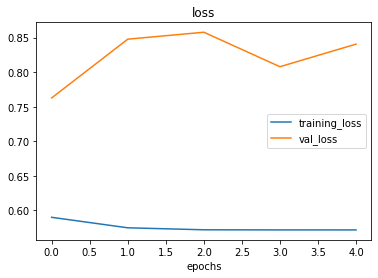

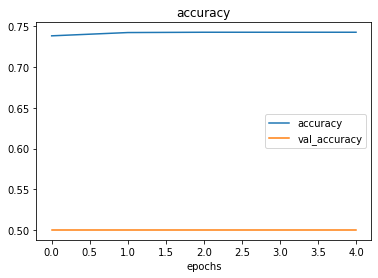

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Evaluating our model
model_5.evaluate(test_data)

20/20 [==============================] - 18s 890ms/step - loss: 0.7014 - accuracy: 0.6250


[0.7014251351356506, 0.625]

## Model 6

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [ ]:
# Build a CNN model 
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=3,
                           activation="relu",
                           padding="same",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.SeparableConv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.SeparableConv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.SeparableConv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.SeparableConv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.SeparableConv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.7),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# seed  
tf.random.set_seed(42)

# Fit the model
history_6 = model_6.fit_generator(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data,
                                  validation_steps=len(val_data),
                                  callbacks=[checkpoint, lr_reduce])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 481s 3s/step - loss: 0.5906 - accuracy: 0.7400 - val_loss: 0.7572 - val_accuracy: 0.5000
Epoch 2/5
163/163 [==============================] - 477s 3s/step - loss: 0.5807 - accuracy: 0.7429 - val_loss: 0.8411 - val_accuracy: 0.5000
Epoch 3/5
163/163 [==============================] - 477s 3s/step - loss: 0.5764 - accuracy: 0.7429 - val_loss: 0.8057 - val_accuracy: 0.5000
Epoch 4/5
163/163 [==============================] - 476s 3s/step - loss: 0.5732 - accuracy: 0.7429 - val_loss: 0.8087 - val_accuracy: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/5
163/163 [==============================] - 477s 3s/step - loss: 0.5723 - accuracy: 0.7429 - val_loss: 0.8129 - val_accuracy: 0.5000


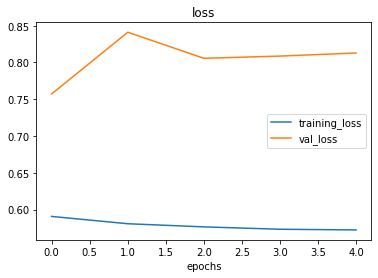

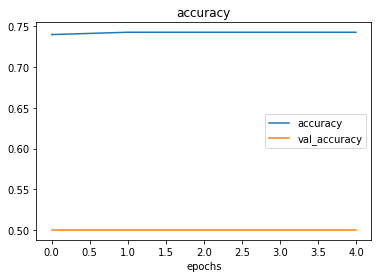

In [ ]:
plot_loss_curves(history_6)

In [ ]:
model_6.evaluate(test_data)

In [ ]:
model_6.save("/content/drive/MyDrive/Pneumonia/model_6.h5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia/model_6h5/assets


## Evaluation

In [ ]:
  # import tensorflow_hub as hub
  # model_url = "https://tfhub.dev/tensorflow/efficientnet/b1/classification/1"
  # IMAGE_SHAPE=(224, 224)
  # # Download the pretrained model and save it as a Keras layer
  # feature_extractor_layer = hub.KerasLayer(model_url,
  #                                          trainable=True, # freezing already learnt patterns 
  #                                          name="feature_extraction_layer",
  #                                          input_shape=IMAGE_SHAPE+(None,))

In [ ]:
model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Pneumonia/efficientnetb1_model.h5", custom_objects={"KerasLayer":KerasLayer})

NameError: ignored